# Importing Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

from regression_analysis.fit_model import linear_regression
from regression_analysis.utils import franke
from regression_analysis.utils.plots import triangulation_for_triheatmap as triheatmap
from regression_analysis.fit_model.apply_regression import plot_stat, apply_regression
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.tri import Triangulation
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import linear_model

import ipywidgets as widget
from ipywidgets import interact, interactive, fixed, interact_manual

import glob as glob
from IPython.display import Image, display, HTML, Video

import multiprocessing as mp

import os
if not os.path.exists('data'):
    os.makedirs('data')
#note my bootstrap can be wrong. 

print("Number of processors: ", mp.cpu_count())

Number of processors:  8


# Demo for applying regression to Franke data 

In [3]:
n = 100 #number of data points along each axis. Total data points = n*n
x1 = np.linspace(0,1,n)
x2 = np.linspace(0,1,n)
xx1, xx2 = np.meshgrid(x1, x2)
xx1 = xx1.reshape((n*n),1)
xx2 = xx2.reshape((n*n),1)

y = franke.Franke(xx1, xx2, noise_var=0.0) #zero mean gaussian noise has variance = var
print(np.max(y))

1.2195347797082343


In [4]:
#create linear regression object by passing input and output data
linear_reg = linear_regression.linear_regression2D(xx1, xx2, y) 

## Apply OLS 

In [5]:
print("own OLS")
linear_reg.apply_leastsquares(order=0, test_ratio=0.1, reg_method="ols")
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

print('\n'+ "Scikit OLS")
linear_reg.apply_leastsquares(order=0, test_ratio=0.1, reg_method="scikit_ols")
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

own OLS
Train MSE 0.055496170985611624
Test MSE 0.05551819347640172
Train R2 0.0
Test R2 -0.0024199459819027602
Train bias 0.055496170985611624
Test bias -0.011576989758622983
Train model variance 0.0
Test model variance 0.0

Scikit OLS
Train MSE 0.05535375349534867
Test MSE 0.05678737388225275
Train R2 0.0
Test R2 -0.00014541660937106293
Train bias 0.05535375349534867
Test bias 0.0028734346546222095
Train model variance 0.0
Test model variance 0.0


In [6]:
linear_reg.apply_leastsquares_bootstrap(order=5, test_ratio=0.1, n_boots=30, reg_method="ols")
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

Train MSE 0.001400180992790695
Test MSE 0.0014127829014259103
Train R2 0.9748243813542443
Test R2 0.9744835728083628
Train bias 0.001874674970895646
Test bias 0.0018321982925271472
Train model variance 0.0018258562733839802
Test model variance 0.001805688863680224


## Apply OLS with cross validation sampling

In [7]:
linear_reg.apply_leastsquares_crossvalidation(order=5, kfolds=10, reg_method="ols")
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

Train MSE 0.0014020977246192185
Test MSE 0.0014107795260302086
Train R2 0.9747353963655518
Test R2 0.9745603695958709
Train bias 0.005528570930664076
Test bias 0.005739547684503722
Train model variance 0.005387129185185406
Test model variance 0.005712706619761198


## Apply Ridge regression 

In [8]:
print("own ridge")
linear_reg.apply_leastsquares(order=5, test_ratio=0.1, reg_method="ridge", lmbda=0.9)
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

print('\n'+"scikit ridge")
linear_reg.apply_leastsquares(order=5, test_ratio=0.1, reg_method="scikit_ridge", lmbda=0.9)
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

own ridge
Train MSE 0.005633886530099752
Test MSE 0.006048324538040115
Train R2 0.8981626343939483
Test R2 0.8940059650723419
Train bias 0.05532239801534347
Test bias 0.0002604785047596545
Train model variance 0.04774464417146186
Test model variance 0.047767959938456866

scikit ridge
Train MSE 0.00560871685006611
Test MSE 0.006368858395241299
Train R2 0.89819400376836
Test R2 0.8921742328017271
Train bias 0.05509221259342975
Test bias 0.004921191286149671
Train model variance 0.047555141139495924
Test model variance 0.04725253378851254


## Apply Ridge regression with bootstrap

In [9]:
linear_reg.apply_leastsquares_bootstrap(order=5, test_ratio=0.1, n_boots=30, reg_method="ridge", lmbda=0.9)
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

Train MSE 0.0056725265308969885
Test MSE 0.005677972642227368
Train R2 0.8978828814959814
Test R2 0.8976190548690515
Train bias 0.0017996053750776848
Test bias 0.0018836775230063304
Train model variance 0.001548449413105633
Test model variance 0.0016115060831425226


## Apply Ridge regression with cross validation

In [10]:
linear_reg.apply_leastsquares_crossvalidation(order=5, kfolds=10, reg_method="ridge", lmbda=0.1)
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

Train MSE 0.003587272896305767
Test MSE 0.00360190313122477
Train R2 0.935359076727772
Test R2 0.93498320594482
Train bias 0.005536755832970619
Test bias 0.005661482355598097
Train model variance 0.004987172084294982
Test model variance 0.005055215205231793


## Apply Lasso regression: Not working properly. High R2 value

In [18]:
lam = np.logspace(-4,0,17)
print(lam)
for lmbda in lam:
    linear_reg.apply_leastsquares(order=5, test_ratio=0.1, reg_method="scikit_lasso", lmbda=lmbda)
    print("Train MSE", linear_reg.trainMSE)
    print("Test MSE", linear_reg.testMSE)
    print("Train R2", linear_reg.trainR2)
    print("Test R2", linear_reg.testR2)
    print("Train bias", linear_reg.trainbias)
    print("Test bias", linear_reg.testbias)
    print("Train model variance", linear_reg.trainvar)
    print("Test model variance", linear_reg.testvar)
    print("---")


[1.00000000e-04 1.77827941e-04 3.16227766e-04 5.62341325e-04
 1.00000000e-03 1.77827941e-03 3.16227766e-03 5.62341325e-03
 1.00000000e-02 1.77827941e-02 3.16227766e-02 5.62341325e-02
 1.00000000e-01 1.77827941e-01 3.16227766e-01 5.62341325e-01
 1.00000000e+00]
Train MSE 0.0061468414646107545
Test MSE 0.006178499438552084
Train R2 0.8892297207419402
Test R2 0.8887499287073193
Train bias 0.055491801539200934
Test bias 0.0010178374059453398
Train model variance 0.047730589436050117
Test model variance 0.047623863880904435
---
Train MSE 0.006487620870620521
Test MSE 0.006278561611208312
Train R2 0.8829868760687102
Test R2 0.8878282134628167
Train bias 0.0554435642113911
Test bias 0.0020659221000301534
Train model variance 0.046642081971755275
Test model variance 0.04614691105091921
---


/home/amandink/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.9224523083676033, tolerance: 0.14910383316289794
  model = cd_fast.enet_coordinate_descent(
/home/amandink/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9938967675274597, tolerance: 0.1487404702310814
  model = cd_fast.enet_coordinate_descent(
/home/amandink/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0030607076781664, tolerance: 0.1491820581393223
  model = cd_fast.enet_coordinate_descent(
/home/amandink/anaconda3/lib/python3.8/site-packages/sklearn/linear_mode

Train MSE 0.007018661054941837
Test MSE 0.006689563099506591
Train R2 0.8736020577969191
Test R2 0.8788215607737142
Train bias 0.05552837203485408
Test bias -0.0019236713599750518
Train model variance 0.04535157361820028
Test model variance 0.046223934932573464
---
Train MSE 0.008251681453525589
Test MSE 0.00819818936485729
Train R2 0.8510942055486764
Test R2 0.8541191493457813
Train bias 0.05541575144526084
Test bias -0.0018492848639332306
Train model variance 0.04309819918495968
Test model variance 0.04442785335117843
---
Train MSE 0.009316781318348271
Test MSE 0.008316805690488187
Train R2 0.8325183322853067
Test R2 0.8468433528763379
Train bias 0.055629646003615724
Test bias -0.004323976709830985
Train model variance 0.040270669790943736
Test model variance 0.041997721467759104
---
Train MSE 0.011642732663034127
Test MSE 0.012328376991103212
Train R2 0.7901299660131664
Test R2 0.778604830544998
Train bias 0.05547904997209287
Test bias 0.0024415561312560174
Train model variance 0.03

/home/amandink/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.15472202625548448, tolerance: 0.14882934778694518
  model = cd_fast.enet_coordinate_descent(


# Regression Comparisons

In [19]:
# For all methods we apply the following parameters
order = np.arange(1,13)
num_points = np.array([25, 50, 75, 100])
noise_var = np.array([0.0, 0.25, 0.5, 0.75, 1.0])
test_ratio = np.round(np.arange(1,5)*0.1, 2)

n_boots = np.array([5, 10], dtype=int)
k_folds = np.array([5, 10], dtype=int)

ridge_lambda = np.array([0.001, 0.01, 0.1, 1.0])
lasso_lambda = np.array([0.00001, 0.0001, 0.001, 0.01])

# Parameters for stochastic gradient descent
learn_rate = np.array([0.001, 0.01, 0.1, 1.0])
num_min_batch = np.array([2, 5, 10, 50])
epochs = np.array([10, 50, 100])

In [21]:
# Save values in numpy file format
np.save("data/order.npy", order)
np.save("data/num_points.npy", num_points)
np.save("data/noise_var.npy", noise_var)
np.save("data/test_ratio.npy", test_ratio)
np.save("data/k_folds.npy", k_folds)
np.save("data/n_boots.npy", n_boots)
np.save("data/ridge_lambda.npy", ridge_lambda)
np.save("data/lasso_lambda.npy", lasso_lambda)
np.save("data/learn_rates.npy", learn_rate)
np.save("data/num_min_batches.npy", num_min_batch)
np.save("data/epochs.npy", epochs)

Perform
* Ordinary Least Squares(OLS) with scikit-learn test train split, own bootstrap, own cross-validation
* Ridge Regression(RR) with scikit-learn test train split, own bootstrap, own cross-validation
* Scikit Lasso Regression(LR) with scikit-learn test train split, own bootstrap, own cross-validation
* Scikit OLS with scikit-learn test train split. Note: this is just for comparing OLS to Scikit-OLS
* Scikit RR with scikit-learn test train split. Note: this is just for comparing OLS to Scikit-OLS

and save output.

In [26]:
# Define for which regression methods and resampling techniques the statistical indicators should be calculated
"""
methods = ["ols", "ols_bootstrap", "ols_crossvalidation", "ridge", 
           "ridge_bootstrap", "ridge_crossvalidation", "lasso", "lasso_bootstrap",
           "lasso_crossvalidation", "ols_sgd", "ols_bootstrap_sgd", "ols_crossvalidation_sgd", "ridge_sgd", 
           "ridge_bootstrap_sgd", "ridge_crossvalidation_sgd"]"""
methods = ["ols", "ols_sgd"]

# Loop over specified methods
for method in methods:
    if "crossvalidation" in method:
        test_ratio_array = np.ones(1)*0.1
    else:
        k_folds = np.ones(1, dtype=int)
    if "bootstrap" not in method:
        n_boots = np.ones(1, dtype=int)
    if "ridge" not in method:
        ridge_lambda = np.ones(1)
    if "lasso" not in method:
        lasso_lambda = np.ones(1)
    # Calculate statistical indicators
    train_MSE, test_MSE, train_R2, test_R2, test_bias, test_var = apply_regression(order, num_points, noise_var,
                                                                                   test_ratios=test_ratio, 
                                                                                   n_boots=n_boots, 
                                                                                   k_folds=k_folds, 
                                                                                   ridge_lambda=ridge_lambda, 
                                                                                   lasso_lambda=lasso_lambda, 
                                                                                   reg_type=method, 
                                                                                   learn_rate=learn_rate,
                                                                                   num_min_batch=num_min_batch,
                                                                                   epochs=epochs)
    # Save output
    np.save("data/train_MSE"+str(method)+".npy", train_MSE)
    np.save("data/test_MSE"+str(method)+".npy", test_MSE)
    np.save("data/train_R2"+str(method)+".npy", train_R2)
    np.save("data/test_R2"+str(method)+".npy", test_R2)
    np.save("data/test_bias"+str(method)+".npy", test_bias)
    np.save("data/test_variance"+str(method)+".npy", test_var)
    # To track loop progress print size of MSE output
    print(train_MSE.shape)


[1.]
(12, 4, 5, 4, 1, 1, 1, 1, 4, 4, 3)
[1.]
(12, 4, 5, 4, 1, 1, 1, 1, 4, 4, 3)


In [ ]:
pool = mp.Pool(processes=5)
#methods = methods = ["e","e","d", "d", "s","d", "d", "s", "ols", "ridge_crossvalidation", "lasso", "lasso_bootstrap",
#           "lasso_crossvalidation", "ols_bootstrap", "ols_crossvalidation", "ridge", 
#           "ridge_bootstrap"]
methods = ["e","e", "ols", "ols_sgd"]
def run_regression(method):
    print(method)
    order = np.load("data/order.npy")
    num_points = np.load("data/num_points.npy")
    noise_var = np.load("data/noise_var.npy")
    test_ratio_array = np.load("data/test_ratio_array.npy")
    k_folds = np.load("data/k_folds.npy")
    n_boots = np.load("data/n_boots.npy")
    ridge_lambda = np.load("data/ridge_lambda.npy")
    lasso_lambda = np.load("data/lasso_lambda.npy")
    
    if "crossvalidation" in method:
        test_ratio_array = np.ones(1)*0.1
    else:
        k_folds = np.ones(1, dtype=int)
    if "bootstrap" not in method:
        n_boots = np.ones(1, dtype=int)
    if "ridge" not in method:
        ridge_lambda = np.ones(1)
    if "lasso" not in method:
        lasso_lambda = np.ones(1)
    # Calculate statistical indicators
    train_MSE, test_MSE, train_R2, test_R2, test_bias, test_var = apply_regression(order, num_points, noise_var,
                                                                                   test_ratios=test_ratio, 
                                                                                   n_boots=n_boots, 
                                                                                   k_folds=k_folds, 
                                                                                   ridge_lambda=ridge_lambda, 
                                                                                   lasso_lambda=lasso_lambda, 
                                                                                   reg_type=method, 
                                                                                   learn_rate=learn_rate,
                                                                                   num_min_batch=num_min_batch,
                                                                                   epochs=epochs)
    # Save output
    np.save("data/train_MSE"+str(method)+".npy", train_MSE)
    np.save("data/test_MSE"+str(method)+".npy", test_MSE)
    np.save("data/train_R2"+str(method)+".npy", train_R2)
    np.save("data/test_R2"+str(method)+".npy", test_R2)
    np.save("data/test_bias"+str(method)+".npy", test_bias)
    np.save("data/test_variance"+str(method)+".npy", test_var)
    # To track loop progress print size of MSE output
    print(train_MSE.shape)
    print("finished ", method)
    return 0
    
[pool.map(run_regression, methods)]

## Widget to compare all experiments

In [29]:
"""methods = ["ols", "ols_bootstrap", "ols_crossvalidation", "ridge", "ridge_bootstrap", "ridge_crossvalidation",
           "lasso", "lasso_bootstrap", "lasso_crossvalidation", "ols_sgd", "ols_bootstrap_sgd", "ols_crossvalidation_sgd", "ridge_sgd", 
           "ridge_bootstrap_sgd", "ridge_crossvalidation_sgd"]"""

methods = ["ols", "ols_sgd"]
stats = ["train MSE", "test MSE", "test R2", "train R2", "test bias", "test variance"]

widget.interact(plot_stat, ratio=test_ratio_array.tolist(), num=num_points.tolist(), stat=stats, 
                method=methods, k_fold=k_folds.tolist(), n_boot=n_boots.tolist(),
                ridge_lmb=ridge_lambda.tolist(), lasso_lmb=lasso_lambda.tolist(), learn_rate=learn_rates.tolist(),
                batch=num_min_batch.tolist(), epoch=epochs.tolist())

interactive(children=(Dropdown(description='ratio', options=(0.1, 0.2, 0.3, 0.4), value=0.1), Dropdown(descrip…

<function regression_analysis.fit_model.apply_regression.plot_stat(ratio=0.1, num=100, stat='test MSE', method='ols', n_boot=1000, k_fold=1000, ridge_lmb=122.0, lasso_lmb=112.2, learn_rate=0.1, batch=5, epoch=50)>

# Bias Variance Tradeoff

In [36]:
#loading data
method = "ols"
order=np.load("data/order.npy")
num_points=np.load("data/num_points.npy")
noise_var=np.load("data/noise_var.npy")
test_ratio_array=np.load("data/test_ratio.npy")
ridge_lambda=np.load("data/ridge_lambda.npy")
k_folds=np.load("data/k_folds.npy")
n_boots=np.load("data/n_boots.npy")
train_MSE=np.load("data/train_MSE"+method+".npy")
test_MSE=np.load("data/test_MSE"+method+".npy")
train_R2=np.load("data/train_R2"+method+".npy")
test_R2=np.load("data/test_R2"+method+".npy")
test_bias=np.load("data/test_bias"+method+".npy")
test_var=np.load("data/test_variance"+method+".npy")

For Ordinary least squares, we find the bias variance tradeoff as a function of model complexity: order of polynomial. We determine it for fixed test ratio and noise level

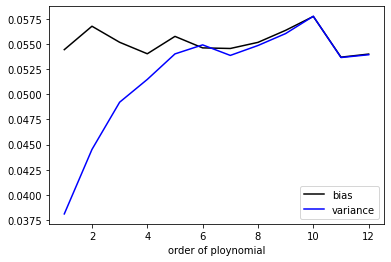

interactive(children=(Dropdown(description='num_point', options=(25, 50, 75, 100), value=25), Dropdown(descrip…

<function __main__.plotOLSstats(num_point, test_ratio, var)>

In [37]:
r_ind = 1 # r=0.1
n_ind = 3 # n=100
noise_ind = 2 #noise variance = 0.5
ols_bias = test_bias[:, n_ind, noise_ind, r_ind, 0, 0, 0]
ols_var = test_var[:, n_ind, noise_ind, r_ind, 0, 0, 0]

fig, ax = plt.subplots()
ax.plot(order, ols_bias, 'k', label = "bias")
ax.plot(order, ols_var, 'b', label = "variance")
ax.legend()
ax.set_xlabel("order of ploynomial")

def plotOLSstats(num_point, test_ratio, var):
    n_ind = 0
    for i in range(len(num_points)):
        if num_point == num_points[i]:
            n_ind = i
    r_ind = 0
    for i in range(len(test_ratio_array)):
        if test_ratio == test_ratio_array[i]:
            r_ind = i
    noise_ind = 0
    for i in range(len(noise_var)):
        if var == noise_var[i]:
            r_ind = i
            
    ols_bias = test_bias[:, n_ind, noise_ind, r_ind, 0, 0, 0]
    ols_var = test_var[:, n_ind, noise_ind, r_ind, 0, 0, 0]

    fig, ax = plt.subplots()
    ax.plot(order, ols_bias, 'k', label = "bias")
    ax.plot(order, ols_var, 'b', label = "variance")
    ax.legend()
    ax.set_xlabel("order of ploynomial")
    
widget.interact(plotOLSstats, num_point=num_points.tolist(), 
                test_ratio=test_ratio_array.tolist(), var=noise_var.tolist())

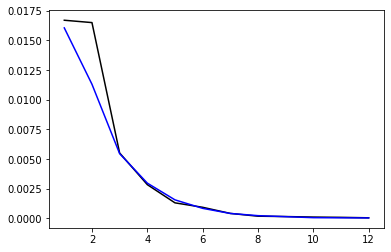

In [26]:
r_ind = 0 # r=0.1
n_ind = 0 # n=100
noise_ind = 4 #noise variance = 0.5
ols_testMSE = test_MSE[:, n_ind, noise_ind, r_ind, 0, 0, 0]
ols_trainMSE = train_MSE[:, n_ind, noise_ind, r_ind, 0, 0, 0]

fig, ax = plt.subplots()
ax.plot(order, ols_testMSE, 'k')
ax.plot(order, ols_trainMSE, 'b')

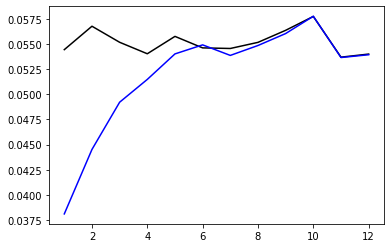

In [27]:
r_ind = 1 # r=0.1
n_ind = 3 # n=100
noise_ind = 2 #noise variance = 0.5
ols_bias = test_bias[:, n_ind, noise_ind, r_ind, 0, 0, 0]
ols_var = test_var[:, n_ind, noise_ind, r_ind, 0, 0, 0]

fig, ax = plt.subplots()
ax.plot(order, ols_bias, 'k')
ax.plot(order, ols_var, 'b')

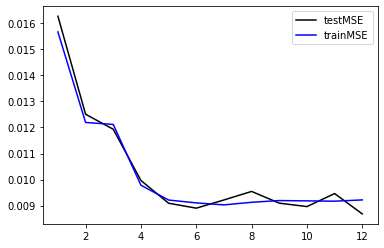

In [32]:
r_ind = 1 # r=0.1
n_ind = 3 # n=100
noise_ind = 2 #noise variance = 0.5
ols_testMSE = test_MSE[:, n_ind, noise_ind, r_ind, 0, 0, 0]
ols_trainMSE = train_MSE[:, n_ind, noise_ind, r_ind, 0, 0, 0]

fig, ax = plt.subplots()
ax.plot(order, ols_testMSE, 'k', label="testMSE")
ax.plot(order, ols_trainMSE, 'b', label="trainMSE")
ax.legend()

## Functions of model complexity for OLS

In [6]:
def OLS_study(n, var, r):
    n=np.array([n])
    var=np.array([var])
    r=np.array([r])
    order = np.arange(1,21)
    method="ols"
    train_MSE, test_MSE, train_R2, test_R2, test_bias, test_var = apply_regression(order, n, var, r)
    print(order.shape)
    fig, ax = plt.subplots(3,1, figsize=(8,8))
    ax[0].plot(order, train_MSE[:,0,0,0,0,0,0,0], 'k', label="train MSE")
    ax[0].plot(order, test_MSE[:,0,0,0,0,0,0,0], 'b', label="test MSE")
    ax[1].plot(order, test_bias[:,0,0,0,0,0,0,0], 'k', label="bias")
    ax[1].plot(order, test_var[:,0,0,0,0,0,0,0], 'b', label="variance")
    ax[2].plot(order, train_R2[:,0,0,0,0,0,0,0], 'k', label="train R2")
    ax[2].plot(order, test_R2[:,0,0,0,0,0,0,0], 'b', label="test R2")
    ax[0].legend()
    ax[1].legend()
    ax[2].legend()
widget.interact(OLS_study, n=(10,200,10), var=(0,1,0.25), r=(0.1,0.5,0.1))

interactive(children=(IntSlider(value=100, description='n', max=200, min=10, step=10), FloatSlider(value=0.0, …

<function __main__.OLS_study(n, var, r)>

In [19]:
def lasso_study(n, var, r, lam):
    n = np.array([n])
    var = np.array([var])
    r = np.array([r])
    lam = np.array([lam])
    order = np.arange(1,11)
    method = "lasso"
    train_MSE, test_MSE, train_R2, test_R2, test_bias, test_var = apply_regression(order, n, var,
                                                                                   r, lasso_lambda=lam, reg_type="lasso")
    print(order.shape)
    fig, ax = plt.subplots(3,1, figsize=(8,8))
    ax[0].plot(order, train_MSE[:,0,0,0,0,0,0,0], 'k', label="train MSE")
    ax[0].plot(order, test_MSE[:,0,0,0,0,0,0,0], 'b', label="test MSE")
    ax[1].plot(order, test_bias[:,0,0,0,0,0,0,0], 'k', label="bias")
    ax[1].plot(order, test_var[:,0,0,0,0,0,0,0], 'b', label="variance")
    ax[2].plot(order, train_R2[:,0,0,0,0,0,0,0], 'k', label="train R2")
    ax[2].plot(order, test_R2[:,0,0,0,0,0,0,0], 'b', label="test R2")
    ax[0].legend()
    ax[1].legend()
    ax[2].legend()
import warnings
warnings.filterwarnings("ignore")
widget.interact(lasso_study, n=(10,50,10), var=(0,1,0.25), r=(0.1,0.5,0.1), lam=np.logspace(-5,0,11).tolist())

interactive(children=(IntSlider(value=30, description='n', max=50, min=10, step=10), FloatSlider(value=0.0, de…

<function __main__.lasso_study(n, var, r, lam)>